In [4]:
# Import Modules! 
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import numpy as np
%matplotlib inline
import pandas as pd
import pickle

# Globe Plot with robinson projection (Andy's prefered projection)

In [ ]:
file = 'GSN_Stations2' #regular text file , whitespace delimiter
gla, glo = np.loadtxt(file, usecols=(2,3), unpack=True, skiprows=1)
stlo=glo
stla=gla

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


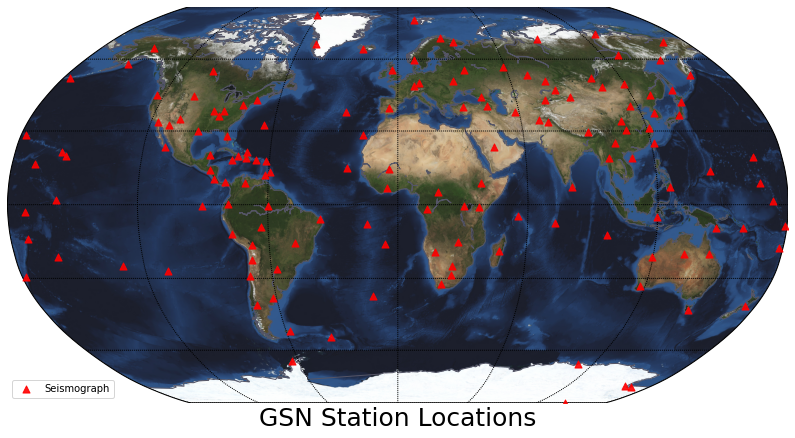

<Figure size 432x288 with 0 Axes>

In [25]:
# Now Plot
plt.figure(figsize=(14, 8))
earth = Basemap(projection='robin',lon_0=0)
earth.drawparallels(np.arange(-90.,120.,30.))
earth.drawmeridians(np.arange(0.,360.,60.))
earth.bluemarble(alpha=0.90) #I like the blue marble color map, alpha sets how transparent it is
earth.drawcoastlines(color='#555566', linewidth=1)
sx, sy = earth(glo, gla)
plt.scatter(sx, sy,alpha=0.9,c='red',s=50,marker='^',label='Seismograph',zorder=10)
plt.legend(loc='lower left')
plt.xlabel("GSN Station Locations", fontsize=25)
plt.show();
plt.savefig('GSN_Stats.png', dpi=350) #save it as a png file

# Static Globe Plot using dataframe as input data 

In [4]:
# Load Data
df=pd.read_pickle('rterg_summary.pkl')
df=df.rename(columns={"Lat.":"Lat", "Long.":"Long","Ehf/Tr^3":"Ehf_Tr3"})
df = df[df["Me"] >= 6.0] # scale mags
# resetting the DatFrame index 
df = df.reset_index() 
mmin=5.5
sMe=((df['Me']-mmin)/10)**2
df['sMe'] = sMe  #format energy magnitude values so can be used as marker size
df

index Eventname                     oTime    Lat    Long  Depth    Me  \
0         0  00010500 2000-01-05 07:40:40+00:00 -11.27  165.25   15.0  6.28   
1         1  00010800 2000-01-08 01:19:46+00:00  -9.78  159.99   15.0  6.32   
2         3  00051699 1999-05-16 00:51:20+00:00  -4.99  152.76   42.0  6.93   
3         6  00111601 2000-11-16 07:42:16+00:00  -5.03  153.17   31.2  7.45   
4         7  00111700 2000-11-17 21:01:56+00:00  -5.26  152.34   17.0  7.13   
...     ...       ...                       ...    ...     ...    ...   ...   
1636   5003  21030606 2021-03-06 10:34:47+00:00 -28.35 -177.74   10.0  6.24   
1637   5004  21030607 2021-03-06 12:05:23+00:00 -28.34 -177.91   10.0  6.33   
1638   5006  21030609 2021-03-06 13:12:05+00:00 -28.30 -177.65   10.0  6.40   
1639   5014  21031000 2021-03-10 20:12:37+00:00 -20.13 -177.67  488.0  6.25   
1640   5015  09021102 2009-02-11 17:34:54+00:00   3.82  126.84   54.0  7.25   

      Txo           Ehf           Ebb  ...  Nstats  iMagType  SRC iMag  \
0      83  1.300000e+13  5.900000e+13  ...      19        M_   __  6.0   
1      78  1.500000e+13  6.800000e+13  ...      24        M_   __  6.4   
2      90  1.900000e+14  5.600000e+14  ...      27        M_   __  7.0   
3     101  8.200000e+14  3.400000e+15  ...      33        M_   __  7.8   
4     107  2.800000e+14  1.100000e+15  ...      30        M_   __  7.8   
...   ...           ...           ...  ...     ...       ...  ...  ...   
1636   65  8.000000e+12  5.200000e+13  ...      40         M   US  5.7   
1637   73  8.300000e+12  7.000000e+13  ...      46         M   US  6.2   
1638   67  2.200000e+13  8.900000e+13  ...      50         M   US  6.0   
1639   89  3.400000e+13  5.300000e+13  ...      57         M   US  5.8   
1640   55  4.100000e+14  1.700000e+15  ...      66        Mo   AT  7.4   

     TACER_HF  TACER_BB                                      Comment  \
0         NaN       NaN          Solomon Islands : IRIS Fetched Data   
1         NaN       NaN          Solomon Islands : IRIS Fetched Data   
2         NaN       NaN   Solomon Islands : IRIS Fetched Data | 1999   
3         NaN       NaN          Solomon Islands : IRIS Fetched Data   
4         NaN       NaN          Solomon Islands : IRIS Fetched Data   
...       ...       ...                                          ...   
1636       24        31                                          NaN   
1637     25.5        23                                          NaN   
1638       25        27                                          NaN   
1639       12        12                                          NaN   
1640      NaN       NaN                                          NaN   

                         mTime iteration       sMe  
0    2016-12-06 22:55:40+00:00         A  0.006084  
1    2016-12-06 23:28:08+00:00         A  0.006724  
2    2016-12-08 17:45:51+00:00         A  0.020449  
3    2016-12-08 17:39:07+00:00         A  0.038025  
4    2016-12-08 17:29:53+00:00         A  0.026569  
...                        ...       ...       ...  
1636 2021-03-06 11:05:59+00:00         6  0.005476  
1637 2021-03-06 12:41:57+00:00         6  0.006889  
1638 2021-03-06 13:45:11+00:00         6  0.008100  
1639 2021-03-10 20:46:15+00:00         6  0.005625  
1640 2009-02-11 18:08:08+00:00         A  0.030625  

[1641 rows x 22 columns]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


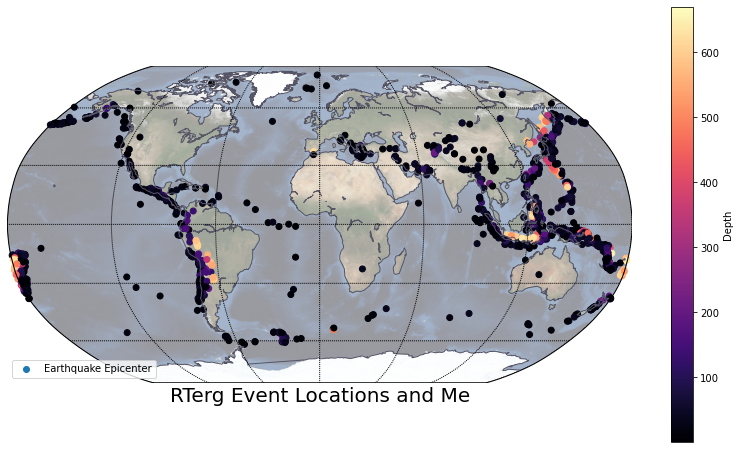

In [4]:
# ------------------
cm = plt.cm.get_cmap('magma') # colorbar colors this one is more red-purple-pink
#cm = plt.cm.get_cmap('viridis') # more green-blue and yellow
plt.figure(figsize=(14, 8))
earth = Basemap(projection='robin',lon_0=0)
earth.drawparallels(np.arange(-90.,120.,30.))
earth.drawmeridians(np.arange(0.,360.,60.))
earth.bluemarble(alpha=0.40)
earth.drawcoastlines(color='#555566', linewidth=1)
x,y = earth(np.array(df.Long),np.array(df.Lat))
Me = np.array(df.Me)
dep = np.array(df.Depth)
sc = plt.scatter(x,y,c=dep,cmap=cm,alpha=1,label='Earthquake Epicenter') # can add s = __ to change marker size by some variable
plt.colorbar(sc,label="Depth")
plt.legend(loc='lower left')
plt.xlabel("RTerg Event Locations and Me", fontsize=20)
plt.show();

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


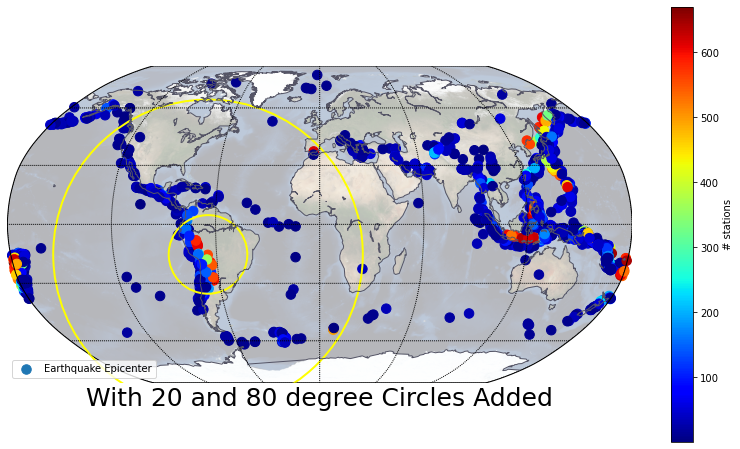

In [37]:
fig,ax = plt.subplots(figsize=(14,8))
map = Basemap(projection='robin',lon_0=0)
map.drawparallels(np.arange(-90.,120.,30.))
map.drawmeridians(np.arange(0.,360.,60.))
map.bluemarble(alpha=0.29)
map.drawcoastlines(color='#555566', linewidth=1)
frx,fry = map(evlo,evla)
sx, sy = map(stlo, stla)
sc = plt.scatter(frx,fry,c=zst,cmap=cm,s=90,label='Earthquake Epicenter')
plt.colorbar(sc,label="# stations")
frx2,fry2 = map(-65,-15.3)
x2,y2 = map(-65,-15.3+80) 
circle1 = plt.Circle((frx2, fry2), y2-fry2, color='yellow',linewidth=2,fill=False)
frx3,fry3 = map(-65,-15.3)
x3,y3 = map(-65,-15.3+20) 
circle2 = plt.Circle((frx3, fry3), y3-fry3, color='yellow',linewidth=2,fill=False)
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.legend(loc='lower left')
plt.xlabel("With 20 and 80 degree Circles Added", fontsize=25)
plt.show();

In [6]:
dfst = pd.read_pickle('dfst.p')
dfst.head(2)

ID    event_time            P    evla     evlo   dep  mag net loc  \
0  1725583  9.470968e+08  947096922.1  -9.131  109.579  35.0  5.6  II  00   
1  1726385  9.481439e+08  948143962.5 -14.642 -177.385  10.0  5.5  IU  00   

   stat  chn         df     stla      stlo    azim   delta  \
0  KAPI  BHZ  19.999975  -5.0142  119.7517  68.627  10.891   
1   AFI  BHN  20.000000 -13.9085 -171.7827  83.061   5.486   

                                             P_array phase    delta2  \
0  [1.3147218420691332e-07, 9.943548760749295e-08...    Pn  10.90014   
1  [1.3035886579311623e-07, 2.4475752871681715e-0...    Pn  5.478464   

   event_count  
0          520  
1          357

In [10]:
evla = dfst[['evla']].to_numpy()
evlo = dfst[['evlo']].to_numpy()
stla = dfst[['stla']].to_numpy()
stlo = dfst[['stlo']].to_numpy()
zst = dfst[['event_count']].to_numpy()
cm = plt.cm.get_cmap('magma')

In [18]:
fig,ax = plt.subplots(figsize=(14,8))
map = Basemap(projection='robin',lon_0=0)
map.drawparallels(np.arange(-90.,120.,30.))
map.drawmeridians(np.arange(0.,360.,60.))
map.bluemarble(alpha=0.29)
map.drawcoastlines(color='#555566', linewidth=1)
frx,fry = map(evlo,evla)
sx, sy = map(stlo, stla)
sc = plt.scatter(frx,fry,c=zst,cmap=cm,marker='^',s=90,label='Stations')
plt.colorbar(sc,label="# stations")
frx2,fry2 = map(30,-115.3)
x2,y2 = map(30,-115.3+25) 
circle1 = plt.Circle((frx2, fry2), y2-fry2, color='yellow',linewidth=2,fill=False)
ax.add_patch(circle1)
plt.legend(loc='lower left')
plt.xlabel("With 20 and 80 degree Circles Added", fontsize=25)
plt.show();

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: need at least one array to concatenate

<Figure size 1008x576 with 2 Axes>

 # *Dynamic* Globe Plot using dataframe as input data (using plotly)

In [5]:
cpoint =dict([ ('lat',0), ('lon',0) ])  # weird things when I recenter on +/-180
fig = px.scatter_geo(df,lat='Lat',lon='Long',projection="natural earth",color='Depth', center= cpoint)
fig.update_layout(width=900)
fig.update_coloraxes(colorscale='jet')
fig.show()

## Add marker size variable by Energy Magnitude :)

In [32]:
cpoint =dict([ ('lat',0), ('lon',0) ])  # weird things when I recenter on +/-180
fig = px.scatter_geo(df,lat='Lat',lon='Long',projection="natural earth",color='Depth', center= cpoint, size='sMe')
fig.update_layout(width=900)
fig.update_coloraxes(colorscale='jet')
fig.show()

# Globe Plots with ortho projection

# Ortho with colorbar

In [ ]:
evla = df[['Lat']].to_numpy()
evlo = df[['Long']].to_numpy()
zst = df[['Depth']].to_numpy()

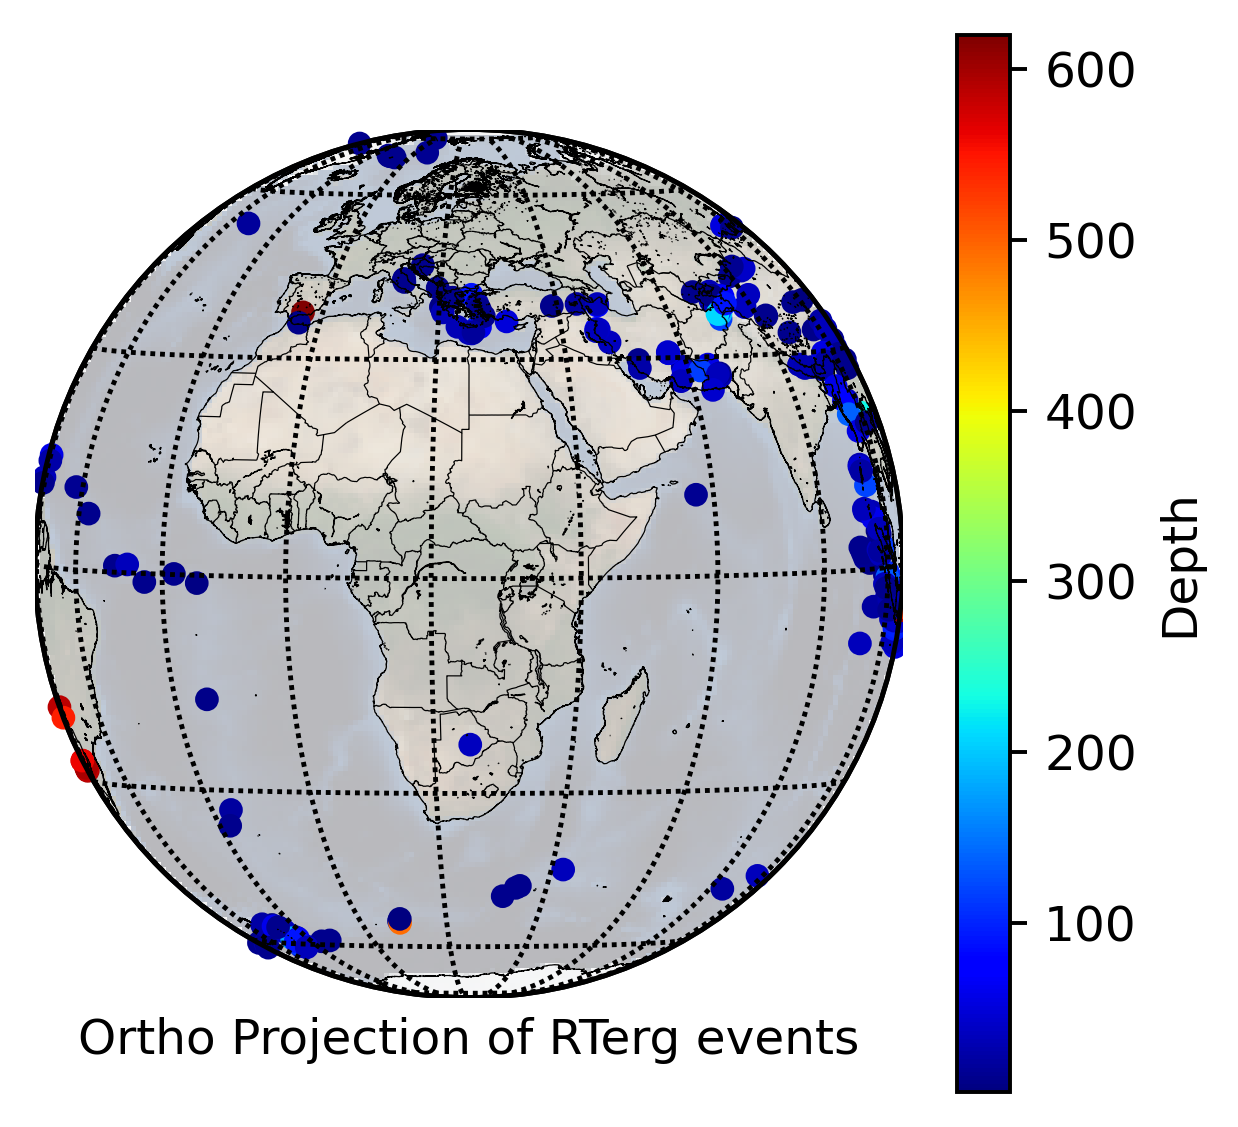

<Figure size 432x288 with 0 Axes>

In [23]:
cm = plt.cm.get_cmap('jet')
# Now Plot
fig= plt.figure(figsize=(4,4),dpi=350)
map = Basemap(projection='ortho',lat_0=2,lon_0=25,resolution='h')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.drawmapboundary(fill_color='whitesmoke')
# draw lat/lon grid lines every 20 and 30 degrees.
map.drawmeridians(np.arange(0,360,20))
map.drawparallels(np.arange(-90,90,30))

#x, y = map(lons*180./np.pi, lats*180./np.pi) subplot map
# contour data over the map.
map.bluemarble(scale=.1,alpha=0.25)
#map.drawcoastlines(color='#555566', linewidth=1)
frx,fry = map(evlo,evla)
sc = plt.scatter(frx,fry,c=zst,cmap=cm,s=15,label='Earthquake Epicenter')
plt.colorbar(sc,label="Depth")
plt.xlabel("Ortho Projection of RTerg events", fontsize=10)
plt.show();
plt.savefig('orthoA.png', dpi=350)

# Ortho Projection plotting stations and earthquakes 

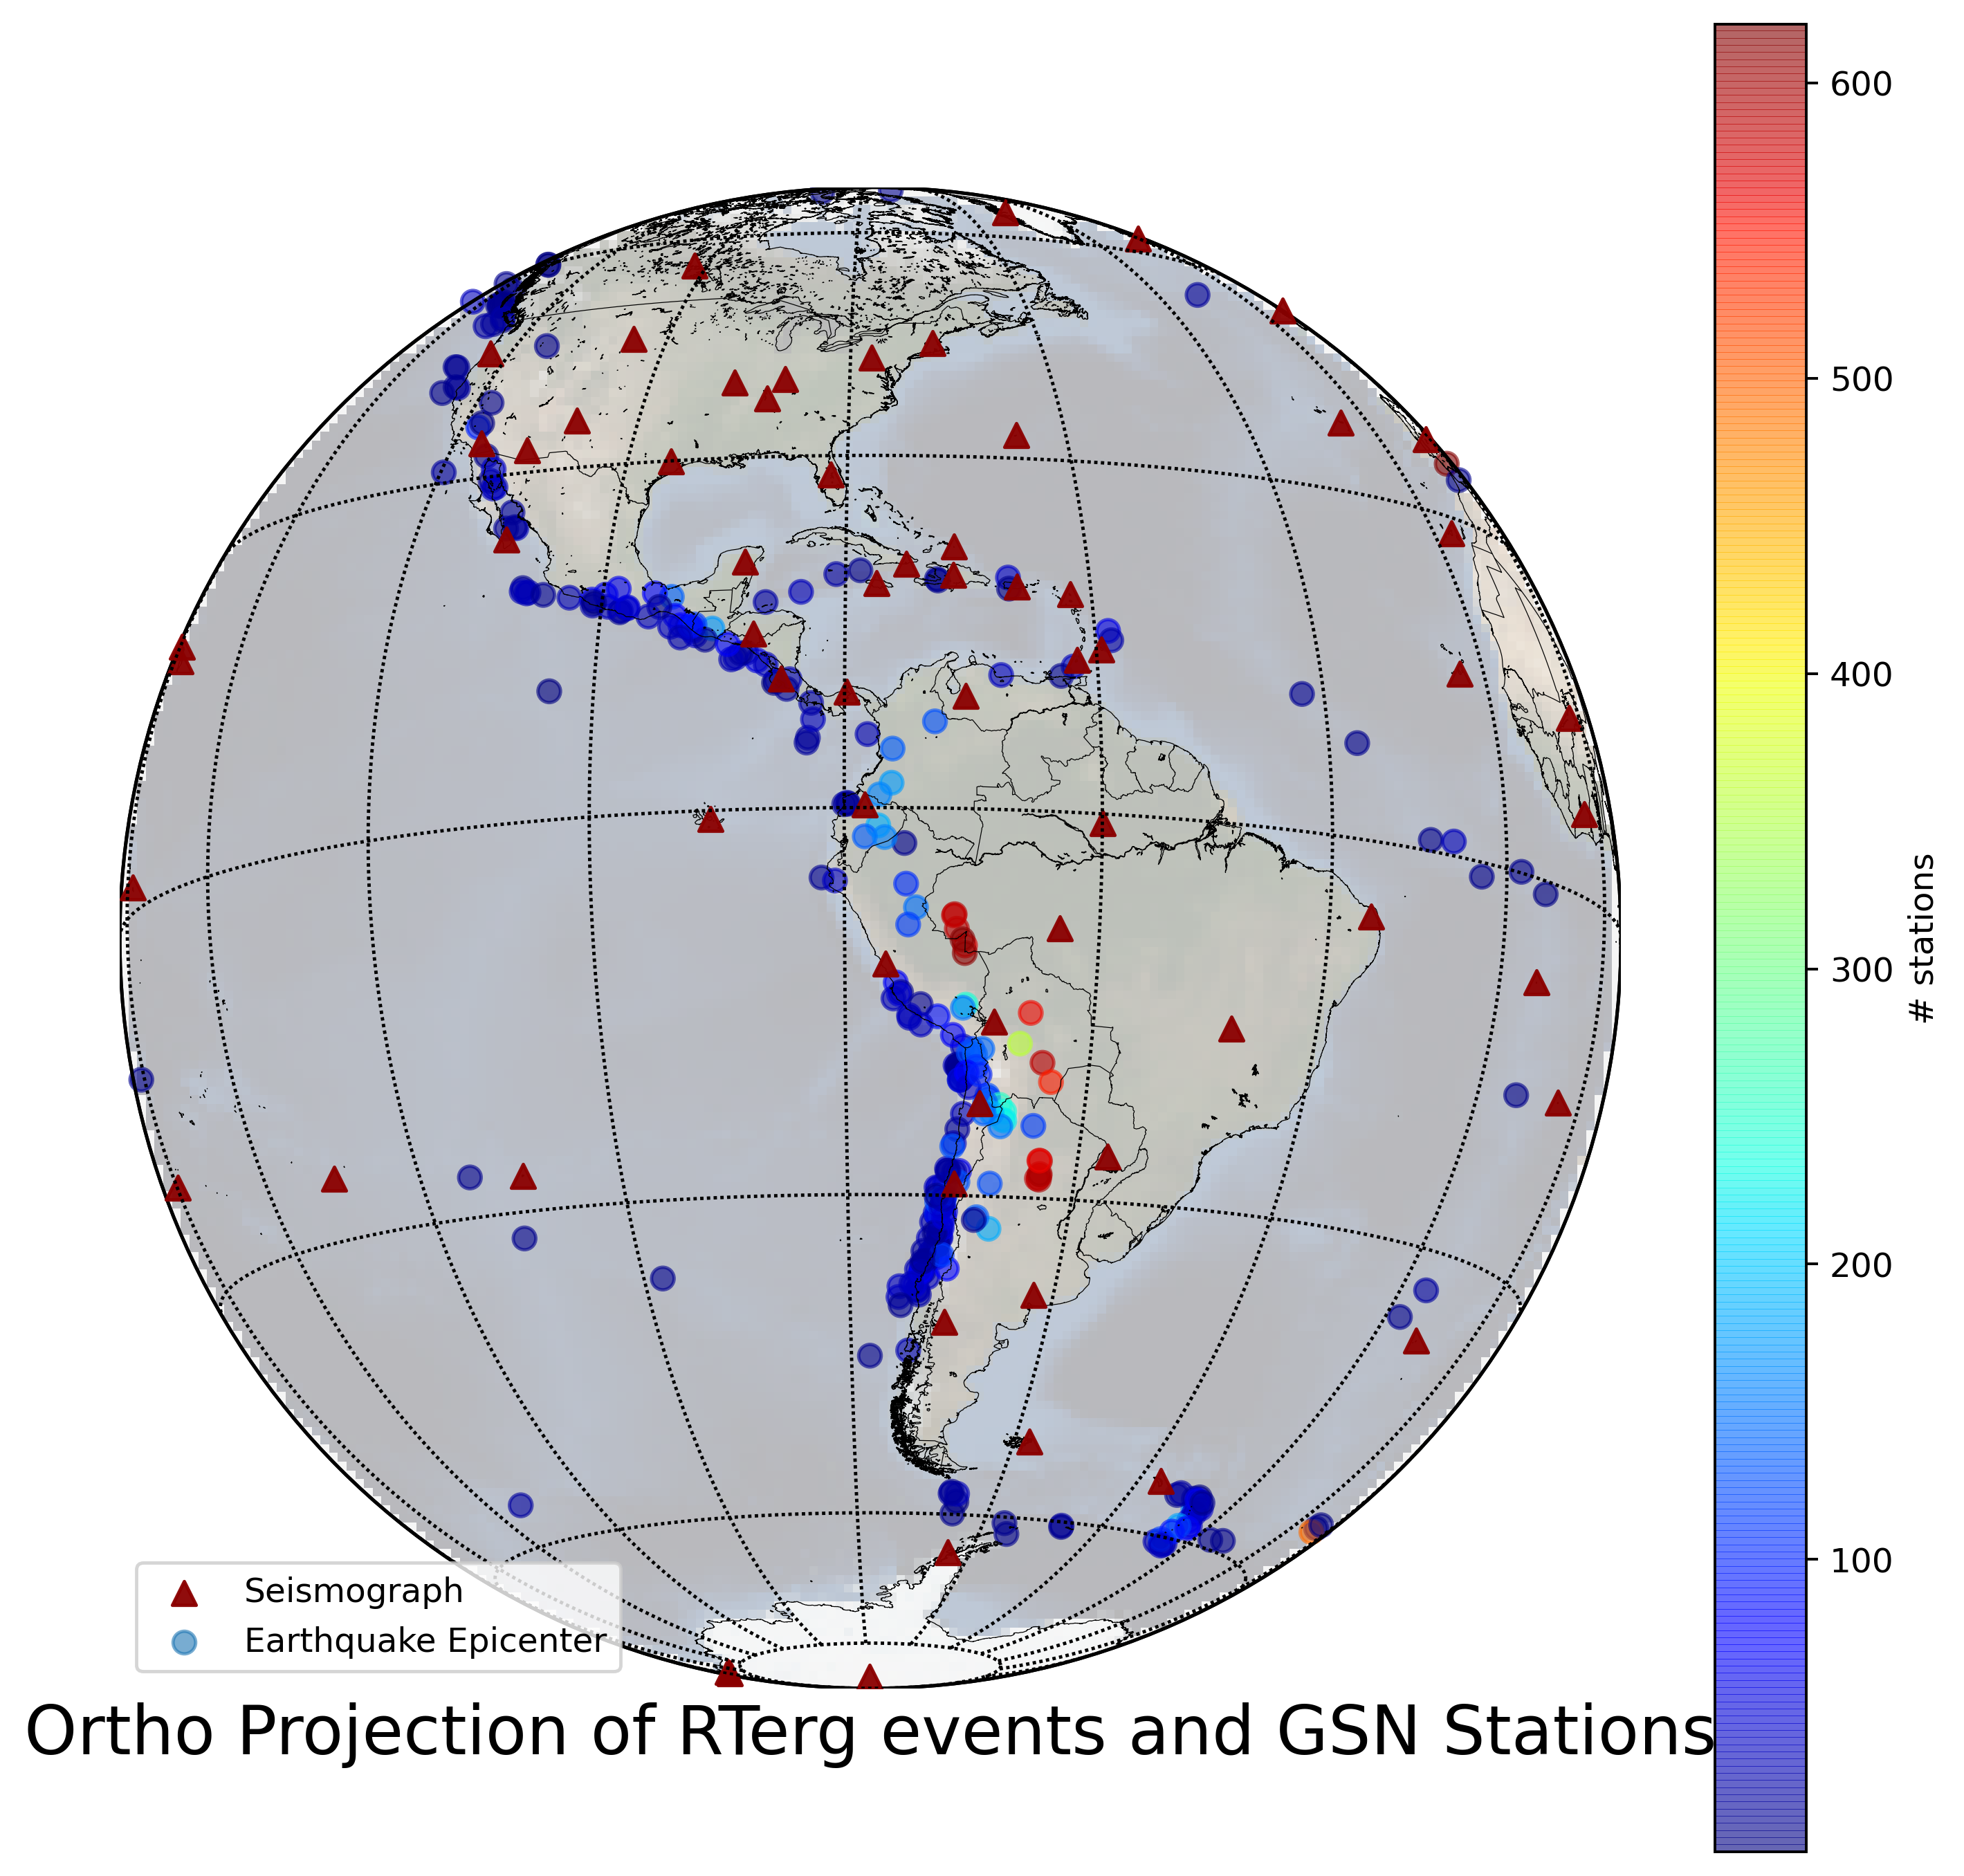

In [41]:
cm = plt.cm.get_cmap('jet')  #('viridis')
fig= plt.figure(figsize=(10,10),dpi=350)
map = Basemap(projection='ortho',lat_0=-10,lon_0=-78,resolution='h')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
#map.fillcontinents(color='gainsboro',lake_color='lightcyan')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='whitesmoke')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,20))
map.drawparallels(np.arange(-90,90,30))
map.bluemarble(scale=.1,alpha=0.25)
frx,fry = map(evlo,evla)
sx, sy = map(glo, gla)
# plot station locations
plt.scatter(sx, sy,c='darkred',alpha=0.95,s=50,marker='^',label='Seismograph',zorder=2)
# plot earthquake locations
sc = plt.scatter(frx,fry,c=zst,cmap=cm,s=45, alpha =.6, zorder=1,label='Earthquake Epicenter')
plt.colorbar(sc,label="# stations")
plt.xlabel("Ortho Projection of RTerg events and GSN Stations", fontsize=20)
plt.legend(loc='lower left')
plt.show();